**The data file diabetes.csv contains data of 768 patients. In this data there are 8 attributes (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age) and 1 response variable (Outcome). The response variable, Outcome, has binary value (1 indicating the outcome is diabetes and 0 means no diabetes). For this assignment purposes we will consider this data as a population.  Use this data to perform the following:**




**a) set a seed (to ensure work reproducibility) and take a random sample of  25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.**   

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/cleaned_diabetes_data.csv')

In [4]:
#setting a seed for work reproducability

np.random.seed(45)

In [5]:
random_sample=25
data_sample=df.sample(random_sample)

In [6]:
sample_glucose_mean=data_sample['Glucose'].mean()
sample_glucose_max=data_sample['Glucose'].max()

sample_glucose_mean, sample_glucose_max

(119.24, 193)

In [7]:
data_glucose_mean=df['Glucose'].mean()
data_glucose_max=df['Glucose'].max()

data_glucose_mean, data_glucose_max

(120.89453125, 199)

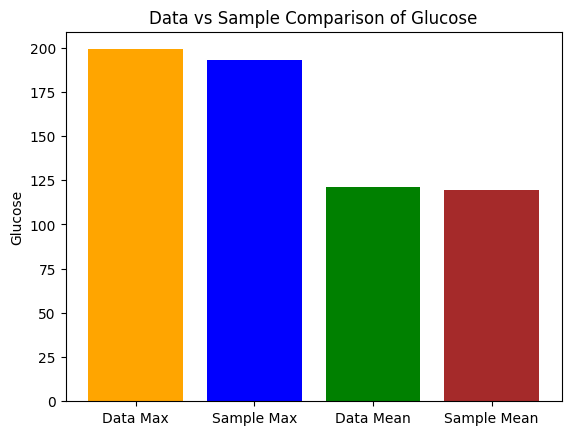

In [10]:
labels = ['Data Max', 'Sample Max','Data Mean','Sample Mean']
values = [data_glucose_max, sample_glucose_max, data_glucose_mean, sample_glucose_mean]
colors = ['orange','blue','green','brown']
plt.bar(labels, values,color=colors)
plt.title("Data vs Sample Comparison of Glucose")
plt.ylabel('Glucose')
plt.show()

**b)  Find the 98th percentile of BMI of your sample and the population and compare the results using charts.**

In [11]:
data_BMI_98th = np.percentile(df['BMI'],98)
sample_BMI_98th = np.percentile(data_sample['BMI'],98)

data_BMI_98th,sample_BMI_98th

(47.52599999999996, 47.78)

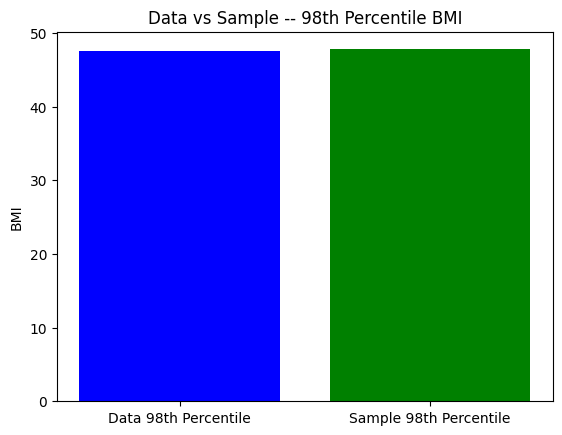

In [12]:
labels = ['Data 98th Percentile', 'Sample 98th Percentile']
values = [data_BMI_98th,sample_BMI_98th]
colors = ['blue','green']

plt.bar(labels, values, color=colors)
plt.title('Data vs Sample -- 98th Percentile BMI')
plt.ylabel('BMI')
plt.show()

**c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings.**

In [13]:
data_mean = df['BloodPressure'].mean()
data_std = df['BloodPressure'].std()
data_25_percentile = np.percentile(df['BloodPressure'],25)
data_50_percentile = np.percentile(df['BloodPressure'],50)
data_75_percentile = np.percentile(df['BloodPressure'],75)

samples=500
size=150
for _ in range(samples):
  bs_sample=df['BloodPressure'].sample(n=size, replace=True)
  bs_mean=bs_sample.mean()
  bs_std=bs_sample.std()
  bs_25_percentile=np.percentile(bs_sample,25)
  bs_50_percentile=np.percentile(bs_sample,50)
  bs_75_percentile=np.percentile(bs_sample,75)

avg_bs_mean=np.mean(bs_mean)
avg_bs_std=np.mean(bs_std)
avg_25_percentile=np.mean(bs_25_percentile)
avg_50_percentile=np.mean(bs_50_percentile)
avg_75_percentile=np.mean(bs_75_percentile)

print("Data Mean: ", data_mean)
print("Data Std: ", data_std)
print("Data_25_Percentile: ", data_25_percentile)
print("Data_50_Percentile: ", data_50_percentile)
print("Data_75_Percentile: ", data_75_percentile)

print("********************************")

print("Avg bootstrap mean: ", avg_bs_mean)
print("Avg bootstrap std: ", avg_bs_std)
print("Avg bootstrap 25th percentile: ", avg_25_percentile)
print("Avg bootstrap 50th percentile: ", avg_50_percentile)
print("Avg bootstrap 75th percentile: ", avg_75_percentile)

Data Mean:  69.10546875
Data Std:  19.355807170644777
Data_25_Percentile:  62.0
Data_50_Percentile:  72.0
Data_75_Percentile:  80.0
********************************
Avg bootstrap mean:  68.38
Avg bootstrap std:  16.66554940326756
Avg bootstrap 25th percentile:  62.0
Avg bootstrap 50th percentile:  70.0
Avg bootstrap 75th percentile:  76.0


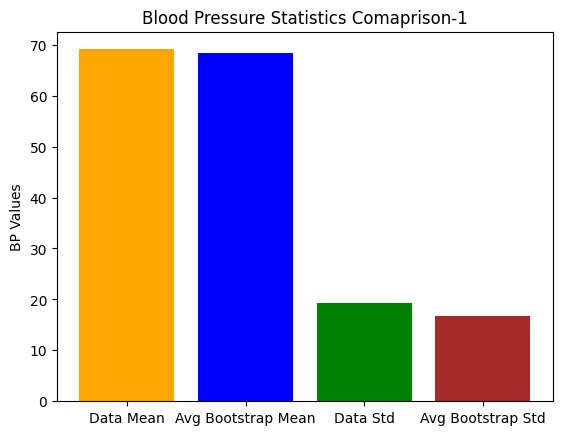

In [14]:
labels = ['Data Mean','Avg Bootstrap Mean', 'Data Std', 'Avg Bootstrap Std']
values = [data_mean, avg_bs_mean, data_std, avg_bs_std]
colors = ['orange','blue','green','brown']
plt.bar(labels, values,color=colors)
plt.title("Blood Pressure Statistics Comaprison-1")
plt.ylabel('BP Values')
plt.show()

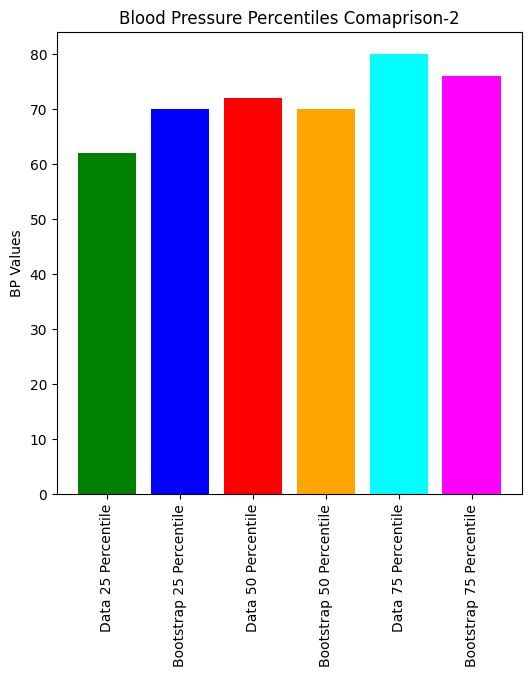

In [24]:
labels_1 = ['Data 25 Percentile', 'Bootstrap 25 Percentile', 'Data 50 Percentile', 'Bootstrap 50 Percentile', 'Data 75 Percentile', 'Bootstrap 75 Percentile']
values_1 = [data_25_percentile, avg_50_percentile, data_50_percentile, avg_50_percentile, data_75_percentile, avg_75_percentile]
colors = ['green','blue','red','orange','cyan','magenta']
plt.figure(figsize=(6,6))
plt.bar(labels_1, values_1,color=colors)
plt.title("Blood Pressure Percentiles Comaprison-2")
plt.ylabel('BP Values')
plt.xticks(rotation=90)
plt.show()